In [1]:
# 필요한 라이브러리 불러오기 
import pandas as pd                  # 데이터 프레임 조작을 위해 판다스 불러오기 
import numpy as np                   # 수치 및 데이터 분석, 배열 조작을 위해  numpy 불러오기

%matplotlib inline
import matplotlib.pyplot as plt      # 데이터 시각화 수행을 위해 matplotlib 불러오기
import seaborn as sns                # 데이터 시각화 수행을 위해 seaborn 불러오기
from copy import copy                # 데이터 프레임을 복사할 때 사용을 위해 copy 불러오기 
from scipy import stats              # 여러가지 과학적인 계산을 위해 scipy 라이브러리에 다양한 통게 확률을 조작하기 위해 stats 모듈 불러오기
import plotly.express as px          # 그래프를 고수준의 인터페이스로 만들기 위해 express 모듈 불러오기 
import plotly.figure_factory as ff   # 더 복잡한 시각화를 위해 figure_factory 모듈 불러오기 
import plotly.graph_objects as go    # 좀 더 디테일한 그래프 설정을 위해 graph_objects 모듈 불러오기

# 경고 메시지 무시 설정
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 한글 깨짐 현상을 막기 위해 폰트 적용
from matplotlib import rc
import platform

if platform.system() == 'Windows':
    rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin': 
    rc('font', family='AppleGothic')
else: #linux
    rc('font', family='NanumGothic')
    
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 현상 해결 코드

## 데이터 확인 
- 데이터 전처리를 마친 데이터를 불러와서 확인 

In [3]:
# 코스피 데이터 불러오기 
kospi_stocks = pd.read_csv("data/kospi_stocks.csv")
# 날짜 별로 정렬
kospi_stocks = kospi_stocks.sort_values(by=["Date"])
kospi_stocks = kospi_stocks.reset_index(drop=True)
print(f"코스피 지수(시장 지수)를 포함한 총 주식수는 총 {len(kospi_stocks.columns[1:])}건 입니다.")
kospi_stocks

코스피 지수(시장 지수)를 포함한 총 주식수는 총 8건 입니다.


,Date,KOSPI,SAMSUNG,HYUNDAI_CAR,KIA,KORMAR,NAVER,KAKAO,THE_HYUNDAI
0,2019-01-02,2010.00,38750,114000,32800,70000,118000,20400,87700
1,2019-01-03,1993.70,37600,116500,32850,69600,122000,20500,87500
2,2019-01-04,2010.25,37450,119500,34850,70100,125500,20700,88200
3,2019-01-07,2037.10,38750,120500,34200,70900,131500,20600,88400
4,2019-01-08,2025.27,38100,119500,33800,68400,130000,19980,87100
...,...,...,...,...,...,...,...,...,...
980,2022-12-23,2313.69,58100,157000,62700,42400,178000,53400,58900
981,2022-12-26,2317.14,57900,158000,63700,41900,178500,53600,59000
982,2022-12-27,2332.79,58100,158000,64100,44100,181000,54400,59400
983,2022-12-28,2280.45,56600,154000,60900,43200,180000,53600,61100


- 컬럼 정보는 아래와 같음
    - KOSPI: 코스피 지수(한국종합주가지수로 유가증권시장에서 상장된 회사들의 주식에 대한 총합인 시가총액의 기준과 비교 시접을 비교하여 나태는 지표)
    - SAMSUNG: 삼성전자(전기, 전자, 반도체)
    - HYUNDAI_CAR: 현대차(자동차)
    - KIA: 기아차(자동차)
    - KORMAR: 한국콜마(화장품)
    - NAVER: 네이버(IT)
    - KAKAO: 카카오(IT)
    - THE_HYUNDAI: 현대백화점(유통)
- 주가 종목선정 기준
    - 필자가 보고 싶은 주가 정보와 대표적인 종목 그리고 섹터별로 선별함 (한마디로 주관적인 기준)

In [4]:
# 코스닥 데이터 불러오기 
kosdaq_stocks = pd.read_csv("data/kosdaq_stocks.csv")
# 날짜 별로 정렬
kosdaq_stocks = kosdaq_stocks.sort_values(by=["Date"])
kosdaq_stocks = kosdaq_stocks.reset_index(drop=True)
print(f"코스닥 지수(시장 지수)를 포함한 총 주식수는 {len(kosdaq_stocks.columns[1:])}건 입니다.")
kosdaq_stocks

코스닥 지수(시장 지수)를 포함한 총 주식수는 7건 입니다.


,Date,KOSDAQ,ECHOPRO_BM,HANA_METERIALS,SM_ENTER,JYP_ENTER,PERARLABYSS,SEOUL_SMC
0,2019-03-06,746.70,16927,18300,46950,30000,166800,24550
1,2019-03-07,736.83,17247,18550,44900,29350,169300,22150
2,2019-03-08,735.97,17223,18150,45300,30100,170300,22050
3,2019-03-11,739.09,17050,18250,40550,31200,182300,21750
4,2019-03-12,754.76,16557,19000,39050,29950,184100,22250
...,...,...,...,...,...,...,...,...
939,2022-12-23,691.25,97000,33100,77100,66900,41900,10900
940,2022-12-26,694.68,97300,34800,79100,67300,43400,11050
941,2022-12-27,704.19,97900,34850,79300,68200,44400,11100
942,2022-12-28,692.37,92200,33350,76000,66900,43000,10500


- 컬럼 정보는 아래와 같음
    - KOSDAQ: 코스닥 지수(밴처 기업, 첨단 기술주 중심인 나스닥을 본따 만든 지표, 유가증권 시장(코스피)과는 규제 조치가 별개로 이루어진 시장)
    - ECHOPRO_BM: 에코프로비엠(2차전지)
    - HANA_METERIALS: 하나머티리얼즈(반도체)
    - SM_ENTER: SM 엔터테인먼트(엔터테인먼트)
    - JYP_ENTER: JYP 엔터테인먼트(엔터테인먼트)
    - PERARLABYSS: 펄어비스(게임)
    - SEOUL_SMC: 서울 반도체(반도체)
- 주가 종목선정 기준
    - 필자가 보고 싶은 주가 정보와 대표적인 종목 그리고 섹터별로 선별함 (한마디로 주관적인 기준)

## 간단한 EDA 

#### 각 마켓 지수 별 평균 수익과 표준편차 

In [5]:
# 코스피 평균 수익은 얼마일까?
kospi_stocks[kospi_stocks.columns.difference(["Date"])].mean()  # 날짜 컬럼 제외 

HYUNDAI_CAR    166503.451777
KAKAO           69606.314721
KIA             60405.025381
KORMAR          48793.248731
KOSPI            2488.587777
NAVER          257226.903553
SAMSUNG         61665.989848
THE_HYUNDAI     75607.918782
dtype: float64

- 코스피 지수의 평균 수익은 "2488.59" 이다. 
- 그리고 한국을 대표하는 주식 삼성전자의 평균 수익은 "61665.98" 이다.

In [6]:
# 코스피의 최소 분포도를 갖는 주식이나 지수는 어떤 것일까? 
kospi_stocks[kospi_stocks.columns.difference(["Date"])].std()

HYUNDAI_CAR    44074.335400
KAKAO          38824.369279
KIA            20856.672560
KORMAR         10585.136726
KOSPI            429.407439
NAVER          99646.751775
SAMSUNG        13105.204222
THE_HYUNDAI    11888.451655
dtype: float64

- 코스피의 표준편차 분포를 살펴보면 가장 적은 표준편차를 가진 종목은 11888.45의 "현대 백화점"이고, 가장 높은 표준편차를 가진 종목은 99646.75의 "NAVER"로 나타났다. 
- 2년 사이 대채적으로 주식이 시장에 따라 보수적으로 간 것이 아닌 왔다 갔다 많이 했다는 뜻으로 해석할 수 있다. 

In [7]:
# 코스닥 평균 수익은 얼마일까?
kosdaq_stocks[kosdaq_stocks.columns.difference(["Date"])].mean()  # 날짜 컬럼 제외 

ECHOPRO_BM        57278.181144
HANA_METERIALS    32667.372881
JYP_ENTER         37868.750000
KOSDAQ              815.825964
PERARLABYSS       58712.913136
SEOUL_SMC         15605.868644
SM_ENTER          48197.457627
dtype: float64

- 코스닥의 경우 코스닥 지수의 평균 수익은 "905.88"이다.
- 코스닥 대표 주식인 에코프로비엠의 평균 수익은 "57278.18" 이다.

In [8]:
# 코스닥의 최소 분포도를 갖는 주식이나 지수는 어떤 것일까? 
kosdaq_stocks[kosdaq_stocks.columns.difference(["Date"])].std()

ECHOPRO_BM        41340.119681
HANA_METERIALS    15819.070638
JYP_ENTER         13670.789510
KOSDAQ              142.198788
PERARLABYSS       28428.033445
SEOUL_SMC          3177.417715
SM_ENTER          18903.345406
dtype: float64

- 코스닥의 표준편차 분포를 살펴 보면 가장 적은 표준편차를 가진 종목은 "3,177.42"의 서울 반도체이고,가장 높은 표준편차 분포는 "41,340"로 에코프로비엠으로 나타냈다.

#### 추세선 그리기 - 비쥬얼라이제이션

In [9]:
# 플로팅을 수행할 함수 선언 - mtpotlib으로 그래프 그리기 함수 
def show_plot(df, fig_title):     # 데이터프렝림과 타이을을 받고 
    df.plot(x="Date", figsize=(15, 7), linewidth=3, title=fig_title)  # ㅇ
    plt.grid()
    plt.show()

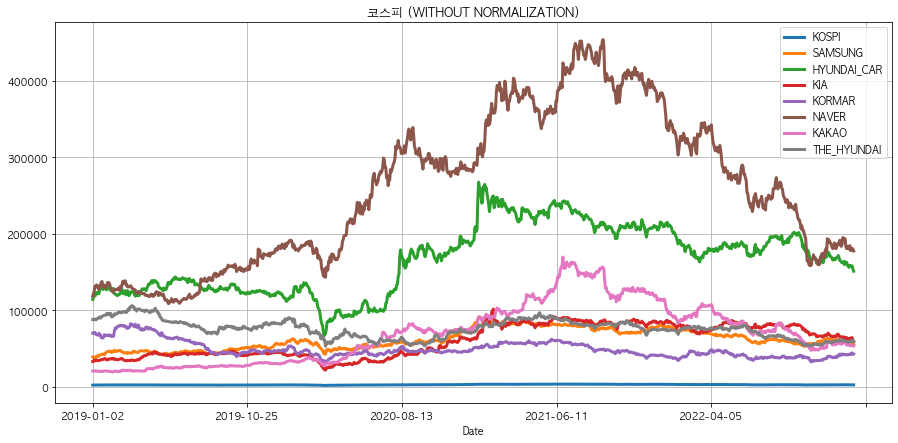

In [10]:
# Plot the data - 정규화된 데이터 제외
show_plot(df=kospi_stocks, fig_title="코스피 (WITHOUT NORMALIZATION)")

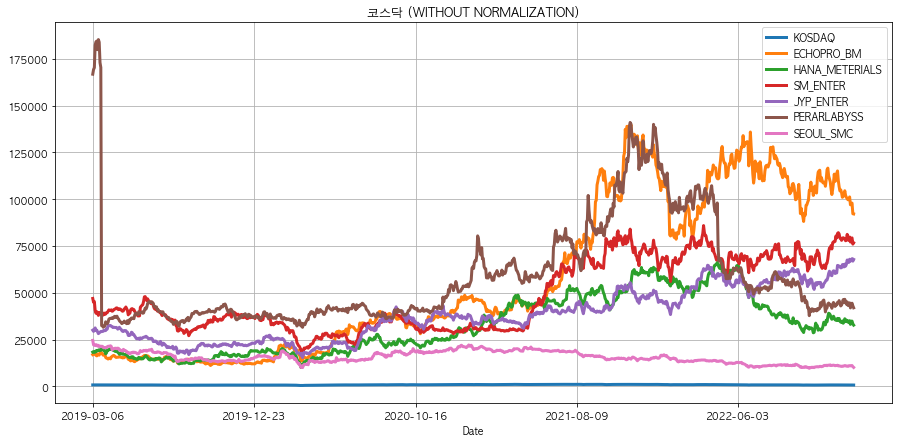

In [11]:
# Plot the data - 정규화된 데이터 제외
show_plot(df=kosdaq_stocks, fig_title="코스닥 (WITHOUT NORMALIZATION)")

- 두 시장의 추세선을 보았을 때 2019 팬더믹이 장기화 되어 주가가 박스권으로 있다가 2020년 부터 오르기 시작한다. 
- 2020년 부터 코로나 시국에 투자 촉진을 위해 공매도 전면금지, 0금리까지 내려간 금리의 영향으로 투자하기 좋은 환경이 조성되어 오르다가 2021년 부터 금리 인상, 우크라이나 전쟁 등의 여파로 불경기가 찾아오면서, 주가가 다시 내려가거나 박스권을 유지하고 있다.

#### 정규화 분석
- 정규화 또는 조정된 데이터를 출력한다는 것은 모든 다른 데이터가 1부터 시작한다은 것을 의미 
- 정규화 공식 
    - 전체값 / 초깃값 

In [12]:
# 정규화 함수 설정
def normalize(df):
    x = df.copy()             # 데이터프레임 복사 
    for i in x.columns[1:]:   # 첫 번째 컬럼을 제외한 나머지 컬럼 기준 데이터프레임을 기준으로 반복문 작성
        x[i] = x[i]/x[i][0]   # 정규화 계산 - 전체값 / 초기값
    return x

In [13]:
# 코스피 지수 - 정규화 
normalize(kospi_stocks)

,Date,KOSPI,SAMSUNG,HYUNDAI_CAR,KIA,KORMAR,NAVER,KAKAO,THE_HYUNDAI
0,2019-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2019-01-03,0.991891,0.970323,1.021930,1.001524,0.994286,1.033898,1.004902,0.997719
2,2019-01-04,1.000124,0.966452,1.048246,1.062500,1.001429,1.063559,1.014706,1.005701
3,2019-01-07,1.013483,1.000000,1.057018,1.042683,1.012857,1.114407,1.009804,1.007982
4,2019-01-08,1.007597,0.983226,1.048246,1.030488,0.977143,1.101695,0.979412,0.993158
...,...,...,...,...,...,...,...,...,...
980,2022-12-23,1.151090,1.499355,1.377193,1.911585,0.605714,1.508475,2.617647,0.671608
981,2022-12-26,1.152806,1.494194,1.385965,1.942073,0.598571,1.512712,2.627451,0.672748
982,2022-12-27,1.160592,1.499355,1.385965,1.954268,0.630000,1.533898,2.666667,0.677309
983,2022-12-28,1.134552,1.460645,1.350877,1.856707,0.617143,1.525424,2.627451,0.696693


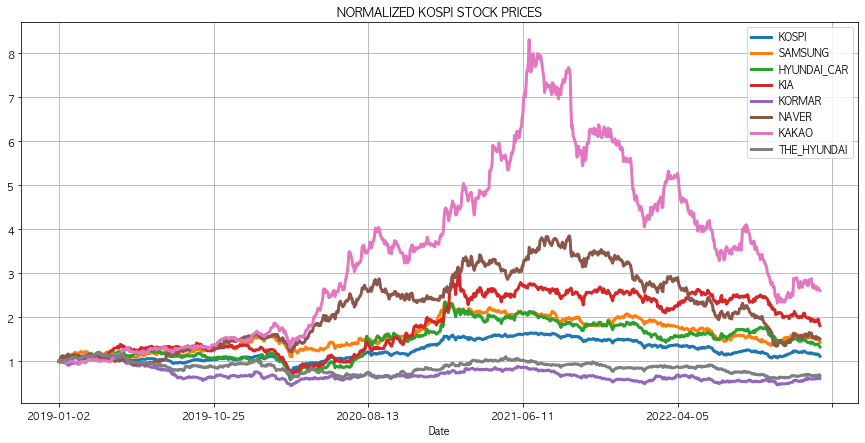

In [16]:
# 그래프 그려보기 
show_plot(df=normalize(kospi_stocks), fig_title="NORMALIZED KOSPI STOCK PRICES")

- 모든 주가 데이터들은 1부터 시작해서, 과연 얼마나 금액을 남겨 먹을 수 있을지 측정 할 수 있다. 
- 여기서 간단히 살펴보면 카카오가 원금 대비 8배 정도 돌려 받을 것을 확인 할 수 있다. 
- 그밖에 1 아래에 있는 값들은 반대로 손해를 볼 수 있는 것을 확인 할 수 있다. 여기 나온 종목 중에서 손해를 많이 볼 만한 종목은 한국 콜마로 대략 -0.5 배로 추정된다. 
- 아무래도 코로나로 유통 및 화장품 업계가 직격탄을 받아 주가가 많이 떨어졌을 것으로 예상된다.

In [15]:
# 코스닥 지수 - 정규화 
normalize(kosdaq_stocks)

,Date,KOSDAQ,ECHOPRO_BM,HANA_METERIALS,SM_ENTER,JYP_ENTER,PERARLABYSS,SEOUL_SMC
0,2019-03-06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2019-03-07,0.986782,1.018905,1.013661,0.956337,0.978333,1.014988,0.902240
2,2019-03-08,0.985630,1.017487,0.991803,0.964856,1.003333,1.020983,0.898167
3,2019-03-11,0.989808,1.007266,0.997268,0.863685,1.040000,1.092926,0.885947
4,2019-03-12,1.010794,0.978141,1.038251,0.831736,0.998333,1.103717,0.906314
...,...,...,...,...,...,...,...,...
939,2022-12-23,0.925740,5.730490,1.808743,1.642173,2.230000,0.251199,0.443992
940,2022-12-26,0.930333,5.748213,1.901639,1.684771,2.243333,0.260192,0.450102
941,2022-12-27,0.943070,5.783659,1.904372,1.689031,2.273333,0.266187,0.452138
942,2022-12-28,0.927240,5.446919,1.822404,1.618743,2.230000,0.257794,0.427699


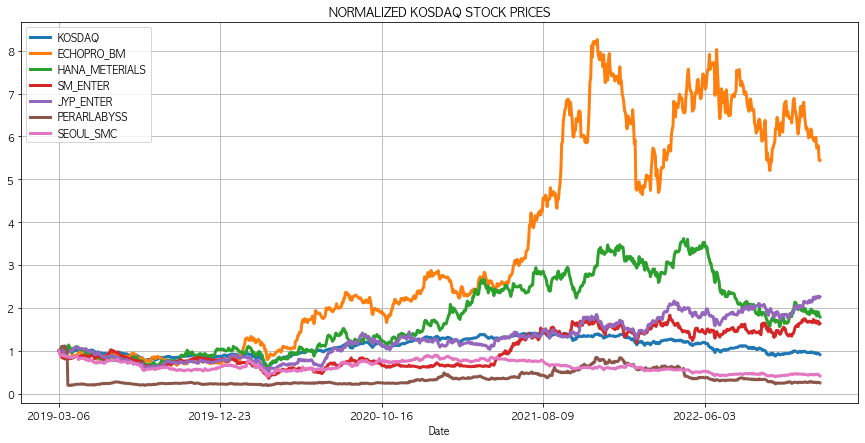

In [18]:
# 그래프 그려보기 
show_plot(df=normalize(kosdaq_stocks), fig_title="NORMALIZED KOSDAQ STOCK PRICES")

- 코스닥으로 보게되면 손해를 보는 주식, 이익을 볼 수 있는 주식이 선명히 갈린다. 
- 0금리 기조와 전기차 열풍으로 2차 전지 주인 에코프로비엠은 8배 이상의 수익을 벌어 들일 수 있다. 
- 하지만 코로나로 인해 봉쇄된 중국 시장 및 전세계 시장의 여파로 게임, 엔터주는 마이너스에 머물러 있다. 

#### 일일 수익율 계산

In [19]:
# 1. 코스피 지수 기준 일일 수익률 계산 
df = kospi_stocks["KOSPI"]
df

0      2010.00
1      1993.70
2      2010.25
3      2037.10
4      2025.27
        ...   
980    2313.69
981    2317.14
982    2332.79
983    2280.45
984    2236.40
Name: KOSPI, Length: 985, dtype: float64

In [20]:
# 일일 기준 변화율 계산 - ((어제 종가 - 금일 종가) / 어제 종가) * 100

df_daily_return = df.copy()

for j in range(1, len(df)):
    df_daily_return[j] = ((df[j] - df[j-1]) / df[j-1]) * 100
    
# 최초 시작 데이터의 이전 데이터가 없으므로 0으로 초기값 설정 
df_daily_return[0] = 0

df_daily_return

0      0.000000
1     -0.810945
2      0.830115
3      1.335655
4     -0.580728
         ...   
980   -1.826259
981    0.149112
982    0.675402
983   -2.243665
984   -1.931636
Name: KOSPI, Length: 985, dtype: float64

In [21]:
# 2. 삼성전자 수익률 계산 
samsung_stock = kospi_stocks["SAMSUNG"]

df_daily_return = samsung_stock.copy()

for j in range(1, len(samsung_stock)):
    df_daily_return[j] = ((samsung_stock[j] - samsung_stock[j-1]) / samsung_stock[j-1]) * 100
       
# 최초 시작 데이터의 이전 데이터가 없으므로 0으로 초기값 설정
df_daily_return[0] = 0

df_daily_return

0      0.000000
1     -2.967742
2     -0.398936
3      3.471295
4     -1.677419
         ...   
980   -1.692047
981   -0.344234
982    0.345423
983   -2.581756
984   -2.296820
Name: SAMSUNG, Length: 985, dtype: float64

In [23]:
# 삼성 전자 일일 수익률 설명 
df_daily_return.describe()

count    985.000000
mean       0.049186
std        1.622483
min       -6.387665
25%       -0.976801
50%        0.000000
75%        0.880282
max       10.470588
Name: SAMSUNG, dtype: float64

In [24]:
# 3. 코스닥 지수 기준 일일 수익률 계산 
df = kosdaq_stocks["KOSDAQ"]

# 일일 기준 변화율 계산 - ((어제 종가 - 금일 종가) / 어제 종가) * 100

df_daily_return = df.copy()

for j in range(1, len(df)):
    df_daily_return[j] = ((df[j] - df[j-1]) / df[j-1]) * 100
    
# 최초 시작 데이터의 이전 데이터가 없으므로 0으로 초기값 설정 
df_daily_return[0] = 0

df_daily_return

0      0.000000
1     -1.321816
2     -0.116716
3      0.423930
4      2.120175
         ...   
939   -3.324383
940    0.496203
941    1.368976
942   -1.678524
943   -1.889163
Name: KOSDAQ, Length: 944, dtype: float64

In [25]:
# 4. 에코프로비엠 수익률 계산 
echoprobm_stock = kosdaq_stocks["ECHOPRO_BM"]

df_daily_return = echoprobm_stock.copy()

for j in range(1, len(echoprobm_stock)):
    df_daily_return[j] = ((echoprobm_stock[j] - echoprobm_stock[j-1]) / echoprobm_stock[j-1]) * 100
       
# 최초 시작 데이터의 이전 데이터가 없으므로 0으로 초기값 설정
df_daily_return[0] = 0

df_daily_return

0      0.000000
1      1.890471
2     -0.139155
3     -1.004471
4     -2.891496
         ...   
939   -4.150198
940    0.309278
941    0.616650
942   -5.822268
943   -0.108460
Name: ECHOPRO_BM, Length: 944, dtype: float64

In [26]:
# 에코프로비엠 일일 수익률 설명 
df_daily_return.describe()

count    944.000000
mean       0.237269
std        3.409817
min      -19.148320
25%       -1.579585
50%        0.093754
75%        1.783992
max       20.983581
Name: ECHOPRO_BM, dtype: float64